In [4]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2
import sys
from matplotlib import pyplot as plt

# Découpage de la photo

Il y a 1 visage(s).


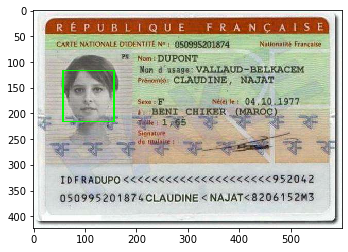

In [60]:
imagePath = r'ci2.jpg'
dirCascadeFiles = r'../opencv/haarcascades_cuda/'
# Récupération de fichiers préconfigurés : https://github.com/opencv/opencv/tree/3.4/data/haarcascades
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cascadefile = dirCascadeFiles + "haarcascade_frontalface_default.xml"
classCascade = cv2.CascadeClassifier(cascadefile)
faces = classCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Il y a {0} visage(s).".format(len(faces)))
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)

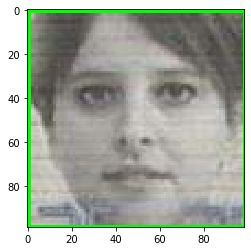

In [61]:
f = faces[0]
plt.imshow(image[f[1]:f[1]+f[3], f[0]:f[0]+f[2]])

# Récupération des autres informations

## Tesseract Sans retouche

In [62]:
print(pytesseract.image_to_string(image))

IDFRADUPO <<<<<<<<K<<eKeees<c<<95 2042
050995201874 CLAUDINE < NAJAT<8206152M3


## Trop de fonds avec une carte d'identité, il va falloir retravailler l'image

In [63]:
# grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,1)
 
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

finalimage = remove_noise(thresholding(grayscale(image)))

REPUBLIQUE FRANC AI iZ
CARTE NATIONALE DIDENTITE Ne: 950995201874 Nationale Francaise

¥8 Nom: DUPONT
Won d’ usages: VALLAUD-BELKACEM
Prénoms): CLAUDINE, NAJAT

   
  
 
 

we 4 cn: Nee) te: 04.10.1977
z mee APE
OF pe EE

IDF RADUPO << << <6 66 KK KK KK KK KEK KK 952042
050995201874 CLAUDINE < NAJAT<8206152M3


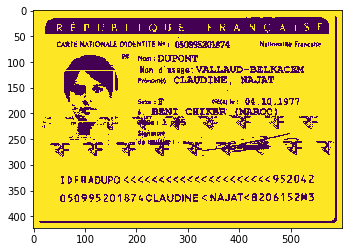

In [64]:
plt.imshow(finalimage)
texteCI = pytesseract.image_to_string(finalimage)
print(texteCI)

In [65]:
def RemoveEmptyLines(entree):
    tab = entree.strip()
    tableausansvide = [ x for x in tab.splitlines() if x!='' ]
    res = ''
    for i in range(0, len(tableausansvide)):
        res = res + tableausansvide[i] + '\n'
    return res

def getTextBetween(mainString, startWord, endWord):
    start = mainString.find(startWord) + len(startWord)
    end = mainString.find(endWord)
    return RemoveEmptyLines(mainString[start:end])

def getCIInfos(texte):
    Nom = getTextBetween(texte, "Nom: ", "Won d’ usages: ")
    Prenom = getTextBetween(texte, "Prénoms):", "we 4 cn:")
    return Prenom.replace("\n",""), Nom.replace("\n","")

n, m = getCIInfos(texteCI)

In [66]:
print ("Nom: {0} {1}".format (n, m))

Nom: CLAUDINE, NAJAT DUPONT
